In [1]:
from pydataset import data
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
df = pd.read_csv('IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll ...,positive
1,A wonderful little production. <br /><br />The filming technique is very unassuming- v...,positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting ...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his cl...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. ...",positive


In [3]:
df.drop_duplicates(inplace = True)

In [4]:
df.sentiment = df.sentiment.map({ 'negative': 0, 'positive': 1 }) 
# Sentiment sütunundaki stringler sayısal değerlere dönüştürülür.
X = df.review.tolist()
y = df.sentiment.tolist() # Var olan iki sütun birer listeye dönüştürülür.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))

In [7]:
clean = re.compile(r'<[^>]+>')
X_train_clean = []
X_test_clean = []
for i, text in enumerate(X_train):
    text2 = text.lower()   # Küçük harfe çevirme
    text2 = text2.replace('\n', '')   #Tüm yeni satır ('\n') karakterlerini kaldırır
    text2 = clean.sub('', text2)   #html etiketlerini kaldırır
    text2 = text2.translate(translator)  #Noktalama işaretlerini boşluklarla değiştirme
    X_train_clean.append(text2)

for i, text in enumerate(X_test):
    text2 = text.lower()
    text2 = text2.replace('\n', '')
    text2 = clean.sub('', text2)
    text2 = text2.translate(translator)
    X_test_clean.append(text2)

X_train_clean = np.array(X_train_clean)
X_test_clean = np.array(X_test_clean)

X_train = X_train_clean
X_test = X_test_clean

X_train_copy = X_train.copy()
X_test_copy= X_test.copy()

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=15000)
x_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
x_test_tfidf = tfidf_vectorizer.transform(X_test)

In [13]:
nb_model = MultinomialNB()
nb_model.fit(x_train_tfidf, y_train)

MultinomialNB()

Test Set Accuracy: 0.8592


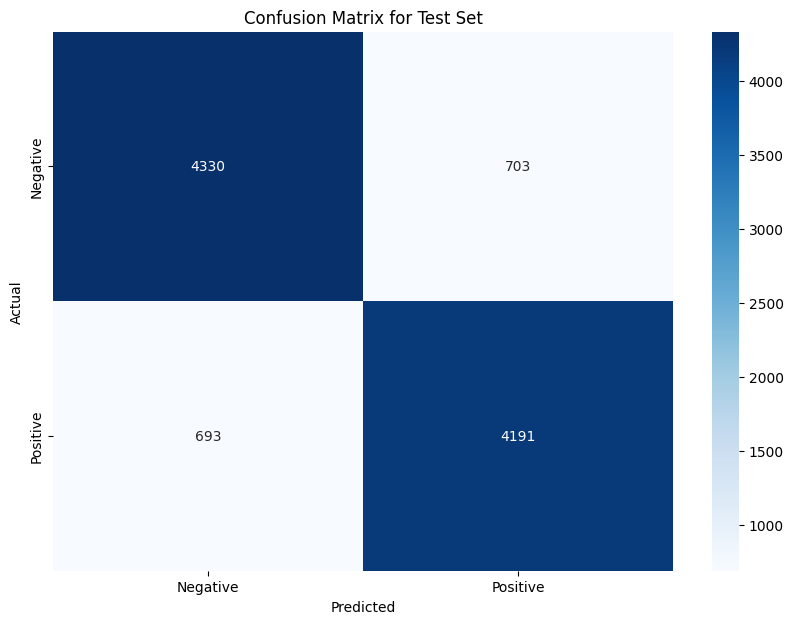

              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      5033
    Positive       0.86      0.86      0.86      4884

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [14]:
# Test seti üzerinde tahminlerde bulunun
y_test_pred = nb_model.predict(x_test_tfidf)


# Doğruluk oranını hesaplayın
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {accuracy:.4f}')

# Karışıklık matrisi oluşturun
cm = confusion_matrix(y_test, y_test_pred)

# Karışıklık matrisini görselleştirin
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Sınıflandırma raporunu yazdırın
print(classification_report(y_test, y_test_pred, target_names=['Negative', 'Positive']))

In [ ]:
def read_file(filename):
  lines = []
  with open(filename, 'r') as file:
    for line in file:
      lines.append(line.strip())
  return lines

In [ ]:
neg = read_file('negative.txt')

In [ ]:
neg_list = []
clean = re.compile(r'<[^>]+>')
for i, text in enumerate(neg):
    tmp_text = text.lower()
    tmp_text = tmp_text.replace('\n', '')
    tmp_text = clean.sub('', tmp_text)
    tmp_text = tmp_text.translate(translator)
    neg_list.append(tmp_text)

neg_list = np.array(neg_list)

In [ ]:
neg_tfidf = tfidf_vectorizer.transform(neg_list)

In [ ]:
y_neg_pred = nb_model.predict(neg_tfidf)

In [ ]:
count_below_05 = np.sum(y_neg_pred < 0.5)
count_above_05 = np.sum(y_neg_pred >= 0.5)

print(f"negative: {count_below_05}")
print(f"positive: {count_above_05}")

In [ ]:
pos = read_file("positive.txt")

In [ ]:
pos_list = []
clean = re.compile(r'<[^>]+>')
for i, text in enumerate(pos):
    tmp_text = text.lower()
    tmp_text = tmp_text.replace('\n', '')
    tmp_text = clean.sub('', tmp_text)
    tmp_text = tmp_text.translate(translator)
    pos_list.append(tmp_text)

pos_list = np.array(pos_list)

In [ ]:
pos_tfidf = tfidf_vectorizer.transform(pos_list)

In [ ]:
y_pos_pred = nb_model.predict(pos_tfidf)

In [ ]:
count_below_05 = np.sum(y_pos_pred < 0.5)
count_above_05 = np.sum(y_pos_pred >= 0.5)

print(f"negative: {count_below_05}")
print(f"positive: {count_above_05}")